# The Solow model with Oil and climate change

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [13]:
import numpy as np
from scipy import optimize
from scipy import linalg
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import OilSolowModelClass
model = OilSolowModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing the model
calling.setup()


# Model description

This model project is inspired by the Macroeconomics I exam from 17th feburay 2020. It is a solow model in a closed economy with an exhaustible
natural resource (oil) it includes economic damage to the production output from climate change with the fraction D.



$$
\begin {aligned}
Y_t &= [1 - D_t] K_t^\alpha (A_tL_t)^\beta E_t^\eta, \alpha, \beta, \eta >0, \alpha +\beta +\eta =1 \\
D_t &= 1 - \frac{R_t}{R_0}^\phi , \phi    >= 0    \\
R_{t+1} &= R_t - E_t,             R_0>0                \\
E_t &= s_E R_t, 0< s_E <1                                     \\
K_{t+1} &= sY_t + (1 - \delta )K_t, 0 < s < 1, 0 < \delta <1, k_0 > 0               \\
L_{t+1} &= (1 + n)L_t, L_0 > 0                              \\
A_{t+1} &= (1 + g)A_t, A_0 > 0                               \\
\end {aligned}
$$

The first equation is a Cobb-Douglas production function describing total output $(Y_t)$ as a function of the physikal capital $(K_t)$, labor $(L_t)$, technology $(A_t)$ and oil $(E_t)$. We assume that climate change reduce the production by a share $D_t$, giving us a damage to the production $(D_tY_t)$ and the share $1-D_t$ survives to cunsumption and investments. The damage by the climate change is given in equation 2 where the climate damages depends on the consumption of oil. If $R_t=R_0$ there is no climate damages, giving us that $D_t=0$ and all the output can be used. The development in the total oil stock $(R_t)$ is givin by equation 3 and 4 where $E_t$ us the consumption of oil and $sE$ is the production og oil. The capital accumulation is described by equation 5 with $s$ as savings rate and $\delta$ the depriciation in capital. Equation 6 and 7 decribes how technology $(A_T)$ and labor $(L_t)$ develops over time. 

we define $y_t= \frac{Y_t}{L_t}, k_t = \frac{K_t}{L_t}, e_t = \frac{E_t}{L_t}$ and $ z_t= \frac{k_t}{y_t}$

## Analytical solution

If your model allows for an analytical solution, you should provide here.

Så laver vi lidt tekst

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

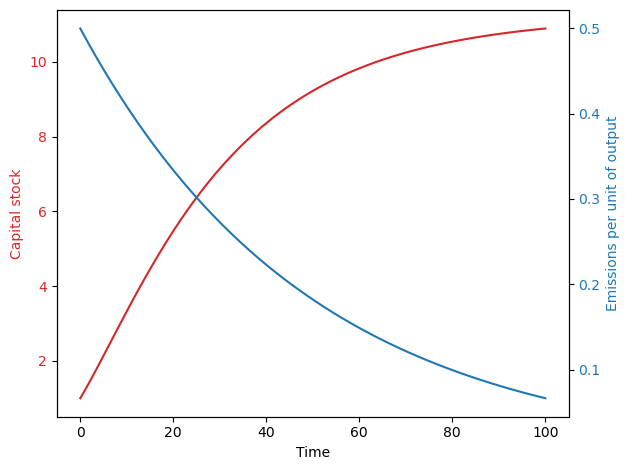

In [9]:


# Define the function that describes the green Solow model
def green_solow_model(k, s, n, delta, alpha, A, g, b, e):
    return s*A*(k**alpha)*(1-b*e) - (delta+n)*k

# Create arrays to store the values of k and e over time
k = np.zeros(T+1)
k[0] = k0
e = np.zeros(T+1)
e[0] = e0

# Iterate the green Solow model over time
for t in range(T):
    k[t+1] = k[t] + green_solow_model(k[t], s, n, delta, alpha, A, g, b, e[t])
    e[t+1] = e[t]*(1-g)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Capital stock', color=color)
ax1.plot(range(T+1), k, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Emissions per unit of output', color=color)
ax2.plot(range(T+1), e, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Finding steady state 

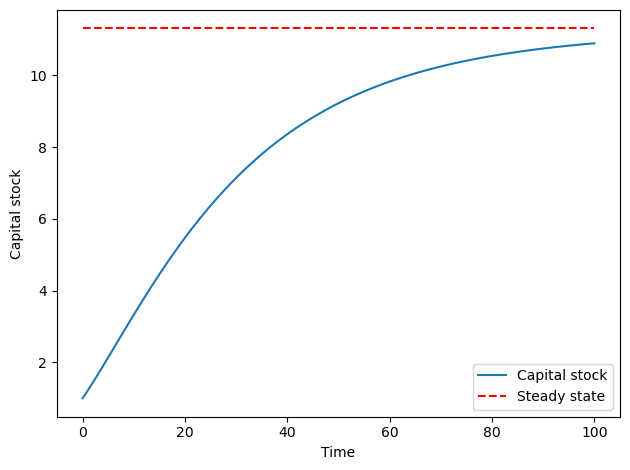

In [10]:
# Define the function that describes the green Solow model
def green_solow_model(k, s, n, delta, alpha, A, g, b, e):
    return s*A*(k**alpha)*(1-b*e) - (delta+n)*k


# Calculate the steady state values of k and e
k_star = ((s*A)/(delta+n))**(1/(1-alpha))
e_star = 0

# Create arrays to store the values of k and e over time
k = np.zeros(T+1)
k[0] = k0
e = np.zeros(T+1)
e[0] = e0

# Iterate the green Solow model over time
for t in range(T):
    k[t+1] = k[t] + green_solow_model(k[t], s, n, delta, alpha, A, g, b, e[t])
    e[t+1] = e[t]*(1-g)

# Plot the results
fig, ax = plt.subplots()

ax.plot(range(T+1), k, label='Capital stock')
ax.plot(range(T+1), np.full(T+1, k_star), 'r--', label='Steady state')
ax.set_xlabel('Time')
ax.set_ylabel('Capital stock')
ax.legend(loc='best')

fig.tight_layout()
plt.show()

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 